**Load a few helpers to pretty print Latex**

In [0]:
from google.colab.output._publish import javascript
mathjaxurl = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"

In [0]:
import numpy as np
from sympy import * # not sure when to use import sympy as sp
import sympy as sp
sp.init_printing(use_latex='mathjax') 
# this is the default printing and in colab it only works if the above mathjaxurl is loaded in the cell

**Starting SJB code**

In [0]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from numpy.linalg import eigh
from math import sqrt

In [0]:
def S_plus_coef(S,m):
    """S+|S,m> = (BLANK) * ħ |S,m+1>. Calculate BLANK."""
    assert (S+m) % 1 == 0
    return sqrt((S-m) * (S+m+1))
def S_minus_coef(S,m):
    """S-|S,m> = (BLANK) * ħ |S,m-1>. Calculate BLANK."""
    assert (S+m) % 1 == 0
    return sqrt((S+m) * (S-m+1))

In [0]:
def H_and_basis(S, min_n, max_n, sector, V, ħω, ΔE):
       
    """Construct the Hamiltonian matrix, and a table of contents defining the
    basis it is written in.
    INPUTS:
    * S, the total spin describing the collection of 2-level systems.
    * max_n, min_n, the range of possible phonon counts that we are modeling.
      (inclusive.)
    * sector is either 'odd' or 'even' or 'both' depending on parity of S+m+n
      (since the interaction conserves parity we can model each separately)
    * V, ΔE, ħω, the three parameters in the Hamiltonian (units of energy)
    OUTPUTS:
    * H, the Hamiltonian matrix
    * index_from_Smn, a dictionary with the property that
      index_from_Smn[(S,m,n)] gives the index of the row / column in H
      corresponding to (S,m,n).
    * Smn_from_index, a list in which Smn_from_index[i] is the (S,m,n)
      describing the i'th row / column in H.
    """
    ### "Table of contents" for basis for H matrix
    possible_ns = range(min_n, max_n+1)
    assert ((2*S) % 1 == 0) and (S >= 0)
    possible_ms = np.arange(2*S+1) - S
    Smn_list = product([S], possible_ms, possible_ns)
    if sector == 'even':
        Smn_from_index = [(S,m,n) for (S,m,n) in Smn_list if (S+m+n) % 2 == 0]
    elif sector == 'odd':
        Smn_from_index = [(S,m,n) for (S,m,n) in Smn_list if (S+m+n) % 2 == 1]
    else:
        assert sector == 'both'
        Smn_from_index = Smn_list
    index_from_Smn = {Smn:index for (index,Smn) in enumerate(Smn_from_index)}

    ### Fill in entries of H matrix
    H = np.zeros(shape=(len(Smn_from_index), len(Smn_from_index)))

    # H = ΔE·Sz/ħ + ħ·ω0(a†·a + ½) + V(a† + a)(S+ + S-)/ħ
    for i,(S,m,n) in enumerate(Smn_from_index):
        # ΔE·Sz/ħ term ... note that Sz|S,m> = ħm|S,m>
        H[i,i] += ΔE * m
        # ħ·ω0(a†·a + ½) term
        H[i,i] += ħω * (n + 1/2)
        # V·a†·S+/ħ term
        if (S,m+1,n+1) in index_from_Smn:
            H[index_from_Smn[(S,m+1,n+1)],i] = S_plus_coef(S,m) * sqrt(n+1) * V
        # V·a·S+/ħ term
        if (S,m+1,n-1) in index_from_Smn:
            H[index_from_Smn[(S,m+1,n-1)],i] = S_plus_coef(S,m) * sqrt(n) * V
        # V·a†·S-/ħ term
        if (S,m-1,n+1) in index_from_Smn:
            H[index_from_Smn[(S,m-1,n+1)],i] = S_minus_coef(S,m) * sqrt(n+1) * V
        # V·a·S-/ħ term
        if (S,m-1,n-1) in index_from_Smn:
            H[index_from_Smn[(S,m-1,n-1)],i] = S_minus_coef(S,m) * sqrt(n) * V
    return H, index_from_Smn, Smn_from_index

**I've taken the plotting function code out into the main program, to simplify and look at variables more easily**

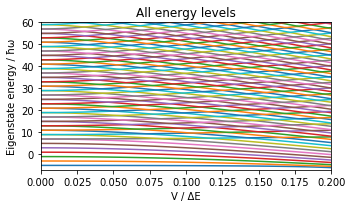

In [8]:
if True:        
    ΔE = 1 # shouldn't matter
    S = 0.5
    min_n = 0
    max_n = 100
    num_quanta = 11    
    sector = 'even'
    V_max = ΔE/5
    ħω=ΔE/num_quanta
    
    #### DOWN TO ZERO PHONONS

    """Plot all the eigenvalues"""
    V_list = np.linspace(0, V_max, num=100)
    energies_array = []
    all_H = list() # added a list for storing H each loop iteration below
    for V in V_list: # changed by FM in next line: get all variables back so we can look at them
        H,index_from_Smn,Smn_from_index = H_and_basis(S, min_n, max_n, sector, V, ħω, ΔE)
        energies,_ = eigh(H)
        energies_array.append(energies)
        all_H.append(H)
    energies_array = np.array(energies_array)
    plt.figure(figsize=(5,3))
    for i in range(np.shape(H)[1]):
        plt.plot(V_list / ΔE, energies_array[:,i]/ħω)
    plt.xlabel('V / ΔE')
    plt.ylabel('Eigenstate energy / ħω')
    plt.title('All energy levels')

    plt.ylim(-7, 60)
    plt.xlim(0, 1/5)
    plt.tight_layout()

**Just looking at some variables below**

In [0]:
len(index_from_Smn)

101

In [0]:
javascript(url=mathjaxurl) # so this needs to be done for every cell where we output

index_from_Smn

{(0.5, -0.5, 0): 0, (0.5, -0.5, 2): 1, (0.5, -0.5, 4): 2, (0.5, -0.5, 6): 3, (
0.5, -0.5, 8): 4, (0.5, -0.5, 10): 5, (0.5, -0.5, 12): 6, (0.5, -0.5, 14): 7, 
(0.5, -0.5, 16): 8, (0.5, -0.5, 18): 9, (0.5, -0.5, 20): 10, (0.5, -0.5, 22): 
11, (0.5, -0.5, 24): 12, (0.5, -0.5, 26): 13, (0.5, -0.5, 28): 14, (0.5, -0.5,
 30): 15, (0.5, -0.5, 32): 16, (0.5, -0.5, 34): 17, (0.5, -0.5, 36): 18, (0.5,
 -0.5, 38): 19, (0.5, -0.5, 40): 20, (0.5, -0.5, 42): 21, (0.5, -0.5, 44): 22,
 (0.5, -0.5, 46): 23, (0.5, -0.5, 48): 24, (0.5, -0.5, 50): 25, (0.5, -0.5, 52
): 26, (0.5, -0.5, 54): 27, (0.5, -0.5, 56): 28, (0.5, -0.5, 58): 29, (0.5, -0
.5, 60): 30, (0.5, -0.5, 62): 31, (0.5, -0.5, 64): 32, (0.5, -0.5, 66): 33, (0
.5, -0.5, 68): 34, (0.5, -0.5, 70): 35, (0.5, -0.5, 72): 36, (0.5, -0.5, 74): 
37, (0.5, -0.5, 76): 38, (0.5, -0.5, 78): 39, (0.5, -0.5, 80): 40, (0.5, -0.5,
 82): 41, (0.5, -0.5, 84): 42, (0.5, -0.5, 86): 43, (0.5, -0.5, 88): 44, (0.5,
 -0.5, 90): 45, (0.5, -0.5, 92): 46, (0.5, -0.5, 94)

In [0]:
len(energies_array)

100

In [0]:
energies_array[0]

array([-0.45454545, -0.27272727, -0.09090909,  0.09090909,  0.27272727,
        0.45454545,  0.63636364,  0.63636364,  0.81818182,  0.81818182,
        1.        ,  1.        ,  1.18181818,  1.18181818,  1.36363636,
        1.36363636,  1.54545455,  1.54545455,  1.72727273,  1.72727273,
        1.90909091,  1.90909091,  2.09090909,  2.09090909,  2.27272727,
        2.27272727,  2.45454545,  2.45454545,  2.63636364,  2.63636364,
        2.81818182,  2.81818182,  3.        ,  3.        ,  3.18181818,
        3.18181818,  3.36363636,  3.36363636,  3.54545455,  3.54545455,
        3.72727273,  3.72727273,  3.90909091,  3.90909091,  4.09090909,
        4.09090909,  4.27272727,  4.27272727,  4.45454545,  4.45454545,
        4.63636364,  4.63636364,  4.81818182,  4.81818182,  5.        ,
        5.        ,  5.18181818,  5.18181818,  5.36363636,  5.36363636,
        5.54545455,  5.54545455,  5.72727273,  5.72727273,  5.90909091,
        5.90909091,  6.09090909,  6.09090909,  6.27272727,  6.27

In [0]:
len(all_H)

100

In [0]:
H[99]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.96977156, 1.97989899,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
d = np.diag(H)
d/ħω

array([ -5.,  -3.,  -1.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,
        17.,  19.,  21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,
        39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,
        61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,
        83.,  85.,  87.,  89.,  91.,  93.,  95.,   7.,   9.,  11.,  13.,
        15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,
        37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,
        59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,
        81.,  83.,  85.,  87.,  89.,  91.,  93.,  95.,  97.,  99., 101.,
       103., 105.])

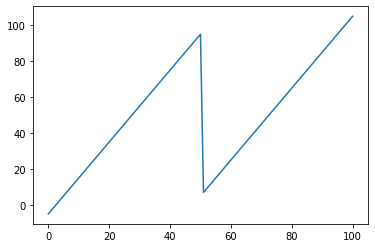

In [0]:
plt.plot(d/ħω)
plt.show()

In [0]:
H.shape

(101, 101)

In [0]:
H

array([[-0.45454545,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.27272727,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.09090909, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  9.18181818,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         9.36363636,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  9.54545455]])

In [0]:
H_sp = sp.Matrix(H)

In [0]:
javascript(url=mathjaxurl) # so this needs to be done for every cell where we output

H_sp

⎡-0.454545454545454         0.0                  0.0                 0.0      
⎢                                                                             
⎢       0.0          -0.272727272727273          0.0                 0.0      
⎢                                                                             
⎢       0.0                 0.0          -0.0909090909090909         0.0      
⎢                                                                             
⎢       0.0                 0.0                  0.0          0.09090909090909
⎢                                                                             
⎢       0.0                 0.0                  0.0                 0.0      
⎢                                                                             
⎢       0.0                 0.0                  0.0                 0.0      
⎢                                                                             
⎢       0.0                 0.0                  0.0

In [0]:
energies

array([-5.47646242e-01, -4.91818736e-01, -4.25031733e-01, -3.35070407e-01,
       -2.33392669e-01, -1.24188140e-01, -9.37876812e-03,  1.09857325e-01,
        2.32715622e-01,  3.58613655e-01,  4.87112177e-01,  6.17868621e-01,
        7.23020305e-01,  7.50630772e-01,  8.85126756e-01,  1.00122414e+00,
        1.02129967e+00,  1.15875610e+00,  1.26779734e+00,  1.29769944e+00,
        1.43760938e+00,  1.52620655e+00,  1.57885131e+00,  1.72082303e+00,
        1.77847654e+00,  1.86405558e+00,  2.00747289e+00,  2.02620379e+00,
        2.15274610e+00,  2.26866123e+00,  2.29870587e+00,  2.44442118e+00,
        2.50903539e+00,  2.59164853e+00,  2.73716898e+00,  2.74806293e+00,
        2.88725602e+00,  2.98056888e+00,  3.03643327e+00,  3.18467275e+00,
        3.21398790e+00,  3.33526828e+00,  3.44338433e+00,  3.48621827e+00,
        3.63573545e+00,  3.67337430e+00,  3.78772712e+00,  3.89943662e+00,
        3.94019108e+00,  4.09063052e+00,  4.12684948e+00,  4.24403686e+00,
        4.35010888e+00,  